<a href="https://colab.research.google.com/github/s0miya/Drug-review-sentiment-analysis/blob/main/Sentiment_Analysis_of_Drug_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip   # download data to notebook

--2023-07-25 13:39:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [       <=>          ]  41.00M  30.6MB/s    in 1.3s    

2023-07-25 13:39:20 (30.6 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]



In [ ]:
!unzip drugsCom_raw.zip          #unzip data

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [ ]:
import pandas as pd
df1 = pd.read_csv('drugsComTest_raw.tsv',delimiter='\t')     # Read the files with the pandas dataFrame
df2 = pd.read_csv('drugsComTrain_raw.tsv', delimiter='\t')   #  pass use the '\t' delimiter as argument because it is a tab separated file to prevent parser error

In [ ]:
df = pd.concat([df1,df2])  # combine the two dataFrames into one for a bigger data size and ease of preprocessing

In [ ]:
df1.shape

(53766, 7)

In [ ]:
df2.shape

(161297, 7)

In [ ]:
df.shape            #confirm concatenation

(215063, 7)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
df.columns = ['Id','drugName','condition','review','rating','date','usefulCount']    #rename columns

In [ ]:
df.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
df['date'] = pd.to_datetime(df['date'])    #convert date to datetime eventhough we are not using date in this

In [ ]:
df['date'].head()             #confirm conversion

0   2012-02-28
1   2009-05-17
2   2017-09-29
3   2017-03-05
4   2015-10-22
Name: date, dtype: datetime64[ns]

In [ ]:
df2 = df[['Id','review','rating']].copy()    # create a new dataframe with just review and rating for sentiment analysis

In [ ]:
df2.head()

,Id,review,rating
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0
2,159672,"""Quick reduction of symptoms""",9.0
3,39293,"""Contrave combines drugs that were used for al...",9.0
4,97768,"""I have been on this birth control for one cyc...",9.0


In [ ]:
df2.isnull().any().any()    # check for null

False

In [ ]:
df2.info(null_counts=True)         #another way to check for null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      215063 non-null  int64  
 1   review  215063 non-null  object 
 2   rating  215063 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ MB


<ipython-input-16-2631d80cbf9c>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(null_counts=True)         #another way to check for null


In [ ]:
df2.info()       #check for datatype, also shows null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      215063 non-null  int64  
 1   review  215063 non-null  object 
 2   rating  215063 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ MB


In [ ]:
df2['Id'].unique()       # shows unique Id as array

array([163740, 206473, 159672, ..., 187382,  47128, 215220])

In [ ]:
df2['Id'].count()      #count total number of items in the Id column

215063

In [ ]:
df2['Id'].nunique()     #shows unique Id values

215063

In [ ]:
df['review'][1]         # access indivdual value

1    "My son has Crohn&#039;s disease and has done ...
1    "My son is halfway through his fourth week of ...
Name: review, dtype: object

In [ ]:
df.review[1]            # another method to assess individual value in a Series

1    "My son has Crohn&#039;s disease and has done ...
1    "My son is halfway through his fourth week of ...
Name: review, dtype: object

In [ ]:
!pip install vaderSentiment       #install Sentiment Analysis  library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
df2.head()

,Id,review,rating
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0
2,159672,"""Quick reduction of symptoms""",9.0
3,39293,"""Contrave combines drugs that were used for al...",9.0
4,97768,"""I have been on this birth control for one cyc...",9.0


In [ ]:
df2['cleanReview'] = df2['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))     # remove stopwords from review

In [ ]:
df2.head()

,Id,review,rating,cleanReview
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo..."
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol...."
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms"""
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking..."
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi..."


In [ ]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df2['vaderReviewScore'] = df2['cleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df2.head()

,Id,review,rating,cleanReview,vaderReviewScore
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7429
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9617


In [ ]:
positive_num = len(df2[df2['vaderReviewScore'] >=0.05])
neutral_num = len(df2[(df2['vaderReviewScore'] >-0.05) & (df2['vaderReviewScore']<0.05)])
negative_num = len(df2[df2['vaderReviewScore']<=-0.05])

In [ ]:
positive_num,neutral_num, negative_num

(106198, 9035, 99830)

In [ ]:
df2['vaderSentiment']= df2['vaderReviewScore'].map(lambda x:int(2) if x>=0.05 else int(1) if x<=-0.05 else int(0) )

In [ ]:
df2['vaderSentiment'].value_counts()

2    106198
1     99830
0      9035
Name: vaderSentiment, dtype: int64

In [ ]:
Total_vaderSentiment = positive_num + neutral_num + negative_num
Total_vaderSentiment

215063

In [ ]:
df2.loc[df2['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] ="positive"
df2.loc[(df2['vaderReviewScore'] >-0.05) & (df2['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
df2.loc[df2['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

In [ ]:
df2.shape

(215063, 7)

In [ ]:
df2.head()

,Id,review,rating,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7429,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767,2,positive
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9617,2,positive


In [ ]:
positive_rating = len(df2[df2['rating'] >=7.0])
neutral_rating = len(df2[(df2['rating'] >=4) & (df2['rating']<7)])
negative_rating = len(df2[df2['rating']<=3])

In [ ]:
positive_rating,neutral_rating,negative_rating

(142306, 25856, 46901)

In [ ]:
Total_rating = positive_rating+neutral_rating+negative_rating
Total_rating

215063

In [ ]:
df2['ratingSentiment']= df2['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=3 else int(0) )

In [ ]:
df2['ratingSentiment'].value_counts()

2    142306
1     46901
0     25856
Name: ratingSentiment, dtype: int64

In [ ]:
df2.head()

,Id,review,rating,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel,ratingSentiment
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7429,2,positive,2
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767,2,positive,2
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000,0,neutral,2
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115,2,positive,2
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9617,2,positive,2


In [ ]:
df2.loc[df2['rating'] >=7.0,"ratingSentimentLabel"] ="positive"
df2.loc[(df2['rating'] >=4.0) & (df2['rating']<7.0),"ratingSentimentLabel"]= "neutral"
df2.loc[df2['rating']<=3.0,"ratingSentimentLabel"] = "negative"

In [ ]:
df2.head()

,Id,review,rating,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel,ratingSentiment,ratingSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7429,2,positive,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767,2,positive,2,positive
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000,0,neutral,2,positive
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115,2,positive,2,positive
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9617,2,positive,2,positive


In [ ]:
df2 = df2[['Id','review','cleanReview','rating','ratingSentiment','ratingSentimentLabel','vaderReviewScore','vaderSentiment','vaderSentimentLabel']]

In [ ]:
df2.head()

,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive


In [ ]:
df2.to_csv('processed.csv')    # To save preprocessed dataset to csv

In [ ]:
df2.head(50)

,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive
5,208087,"""4 days in on first 2 weeks. Using on arms an...","""4 days first 2 weeks. Using arms face. Put va...",4.0,0,neutral,0.3818,2,positive
6,215892,"""I&#039;ve had the copper coil for about 3 mon...","""I&#039;ve copper coil 3 months now. I really ...",6.0,0,neutral,-0.8319,1,negative
7,169852,"""This has been great for me. I&#039;ve been on...","""This great me. I&#039;ve 2 weeks last week I ...",9.0,2,positive,0.7964,2,positive
8,23295,"""Ive been on Methadone for over ten years and ...","""Ive Methadone ten years currently,I trying ge...",7.0,2,positive,0.2023,2,positive
9,71428,"""I was on this pill for almost two years. It d...","""I pill almost two years. It work far getting ...",2.0,1,negative,-0.8834,1,negative


In [ ]:
import os
os.stat('processed.csv').st_size         # Check size of csv file About 181MB

181611736

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Id                    215063 non-null  int64  
 1   review                215063 non-null  object 
 2   cleanReview           215063 non-null  object 
 3   rating                215063 non-null  float64
 4   ratingSentiment       215063 non-null  int64  
 5   ratingSentimentLabel  215063 non-null  object 
 6   vaderReviewScore      215063 non-null  float64
 7   vaderSentiment        215063 non-null  int64  
 8   vaderSentimentLabel   215063 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 24.5+ MB


In [ ]:
df2.to_csv('processed.csv.gz',compression='gzip')

In [ ]:
os.stat('processed.csv.gz').st_size    #compressed to about 54MB

54002892

In [ ]:
df = pd.read_csv('processed.csv.gz')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            215063 non-null  int64  
 1   Id                    215063 non-null  int64  
 2   review                215063 non-null  object 
 3   cleanReview           215063 non-null  object 
 4   rating                215063 non-null  float64
 5   ratingSentiment       215063 non-null  int64  
 6   ratingSentimentLabel  215063 non-null  object 
 7   vaderReviewScore      215063 non-null  float64
 8   vaderSentiment        215063 non-null  int64  
 9   vaderSentimentLabel   215063 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


In [ ]:
df.head()

,Unnamed: 0,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive


In [ ]:
df = df.drop(columns=df.columns[0])

In [ ]:
df.head()

,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive


In [ ]:
df.groupby('vaderSentimentLabel').size()

vaderSentimentLabel
negative     99830
neutral       9035
positive    106198
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

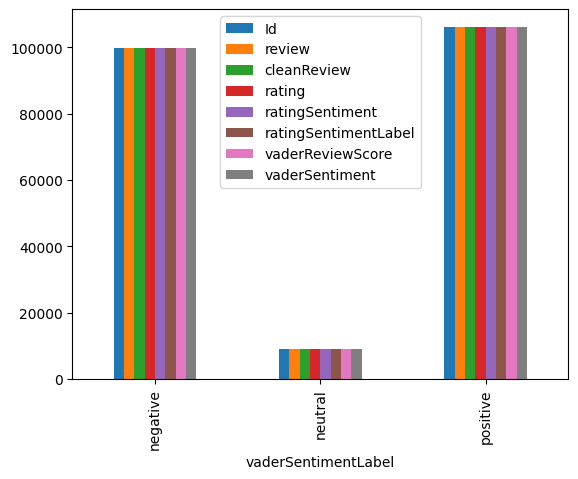

In [ ]:
df.groupby('vaderSentimentLabel').count().plot.bar()
plt.show()

In [ ]:
df.groupby('ratingSentimentLabel').size()

ratingSentimentLabel
negative     46901
neutral      25856
positive    142306
dtype: int64

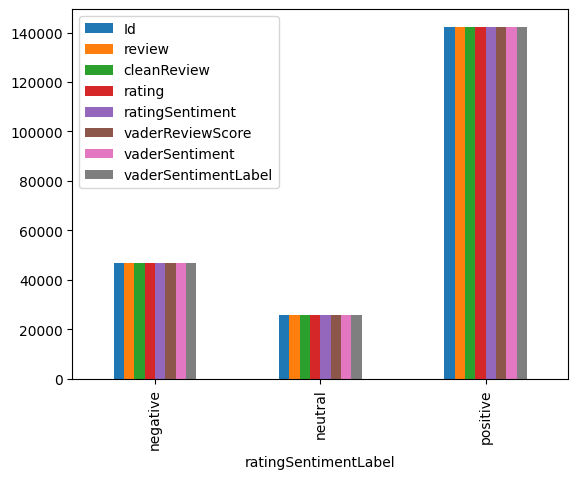

In [ ]:
df.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

In [ ]:
df.groupby('ratingSentiment').size()

ratingSentiment
0     25856
1     46901
2    142306
dtype: int64

In [ ]:
positive_vader_sentiments = df[df.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

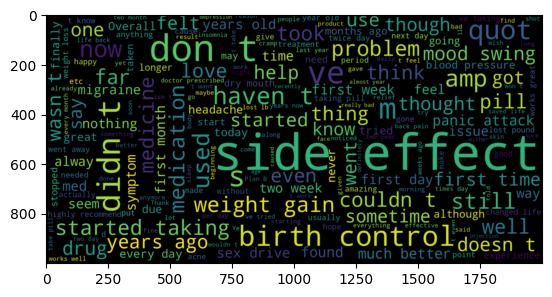

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [ ]:
for s in positive_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"I&#039;ve tried antidepressants years (citalopram, fluoxetine, amitriptyline), none helped depression, insomnia &amp; anxiety. My doctor suggested changed onto 45mg mirtazapine medicine saved life. Thankfully I side effects especially common - weight gain, I&#039;ve actually lost alot weight. I still suicidal thoughts mirtazapine saved me."
"My son Crohn&#039;s disease done well Asacol. He complaints shows side effects. He taken many nine tablets per day one time. I&#039;ve happy results, reducing bouts diarrhea drastically."
"I birth control one cycle. After reading reviews type similar birth controls I bit apprehensive start. Im giving birth control 9 10 I long enough 10. So far I love birth control! My side effects minimal like Im even birth control! I experienced mild headaches nausea ive feeling great! I got period cue third day inactive pills I idea coming I zero pms! My period light I barely cramping! I unprotected sex first month obviously didn&#039;t get pregnant I&#039;m ple

In [ ]:
negative_vader_sentiments = df[df.ratingSentiment == 1]
negative_string = []
for s in negative_vader_sentiments.cleanReview:
  negative_string.append(s)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

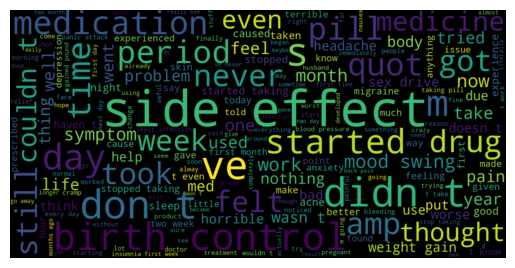

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(negative_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
for s in negative_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"About two months ago I switch LoLestrin Fe microgestin due insurance pharmacy. Since starting microgestin I&#039;ve noticed insane bloating nausea weird discharge. While lolestrin, periods consisted spotting average side effects, nothing serious, one month micro I got period heavy cramping painful I leave class. I&#039;ve also noticed I&#039;ve developed bad depression mood swings intense. My anxiety bad sex drive low nonexistent anymore. It helped acne I&#039;m lot paranoid getting pregnant I lolestrin. I&#039;m going talking doctor possibly getting shot."
"I 12 year survivor mirapex/Pramepexole. It miracle begin with. I slept 4hrs night enormous energy never tired. That lasted nine years. But time I lost bladder control, impulse disorders, loss concentration, myalgia neuropathy, falling asleep driving, many augmentation. I .5 mg. Detoxing med free med horrendous! After detox side effects cleared up. But I still issues memory concentration. This med I took reg bases health good. Im s

In [ ]:
neutral_vader_sentiments = df[df.ratingSentiment == 0]
neutral_string = []
for s in neutral_vader_sentiments.cleanReview:
  neutral_string.append(s)
neutral_string = pd.Series(neutral_string).str.cat(sep=' ')

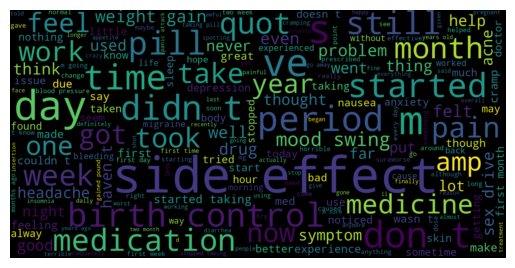

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(neutral_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
for s in neutral_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"Have Actos almost year, gained 24 pounds swelling hands feet retaining lot water thighs. My sugar levels good. My doctor lowered dosage 30 mg 15 mg refused take off. Will get second opinion side effects much."
"I&#039;d never birth control months ago, I given Ortho Tri-Cyclen Lo starter, I want much hormones. I went two whole packs decided switch extremely low sex drive, extreme mood swings increased appetite (I would eat full meal two hours later stomach would growling again). My relationship began suffer due side effects I stopped taking back normal. However, pill DID pros: I didn&#039;t get pregnant, regulated period caused breakouts acne. But wary weight gain, decreased libido mood swings."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(df.cleanReview)
labels   = df.vaderSentiment

In [ ]:
features.shape

(215063, 1619394)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['cleanReview'],df['ratingSentimentLabel'],random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [ ]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.494362
1,RandomForestClassifier,1,0.494316
2,RandomForestClassifier,2,0.493897
3,RandomForestClassifier,3,0.493955
4,RandomForestClassifier,4,0.494257
5,LinearSVC,0,0.941948
6,LinearSVC,1,0.943343
7,LinearSVC,2,0.945598
8,LinearSVC,3,0.947968
9,LinearSVC,4,0.945597


In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.944891
LogisticRegression        0.902787
MultinomialNB             0.832779
RandomForestClassifier    0.494158
Name: accuracy, dtype: float64

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
model = LinearSVC('l2')
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9391250976453521


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1392,   345,   482],
       [   11, 23738,  1229],
       [   39,  1167, 25363]])

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

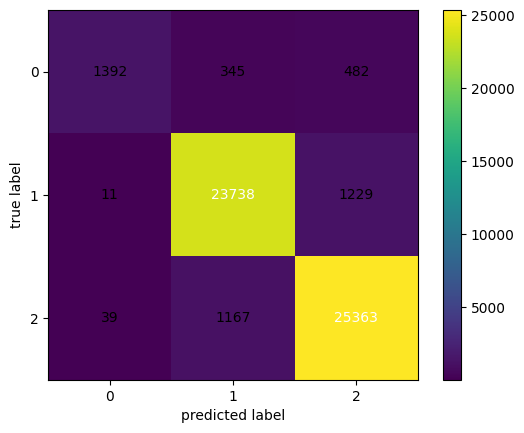

In [ ]:
fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='viridis')

In [ ]:
from  sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names= df['ratingSentimentLabel'].unique()))

              precision    recall  f1-score   support

    positive       0.97      0.63      0.76      2219
     neutral       0.94      0.95      0.95     24978
    negative       0.94      0.95      0.95     26569

    accuracy                           0.94     53766
   macro avg       0.95      0.84      0.88     53766
weighted avg       0.94      0.94      0.94     53766

